# MNIST Image Classification using LeNet-5

![](images/Lenet-5.png)

## Activation Function
Tanh

## Fully Connected VS. Gaussian Connected
* Fully Connected: Activation Function exists
* Gaussian Connected: Activation Function does not exist

## Import Packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.datasets.mnist as mnist
import tensorflow.keras as keras
from progressbar import progressbar

## Load data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
x_cv = x_train[0:10000,:,:]
y_cv = y_train[0:10000]
x_train = x_train[10000:60000,:,:]
y_train = y_train[10000:60000]

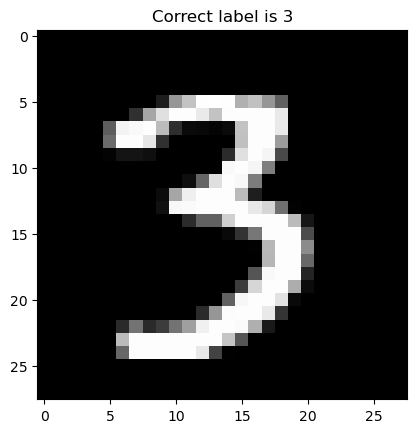

In [8]:
def show_image(image, label):
    plt.imshow(np.uint8(image) , 'gray')
    plt.title(f"Correct label is {label}")

show_image(x_train[0], y_train[0])

In [9]:
# normalize the data
x_train = x_train / 255 ; x_cv = x_cv / 255 ; x_test = x_test / 255

## Build LeNet-5

In [21]:
lenet_5 = tf.keras.Sequential([
    tf.keras.Input(shape = (28, 28, 1)),
    
    # conv
    tfl.Conv2D(filters = 6,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='same',
               activation ='tanh'),
    
    # subsampling
    tfl.AveragePooling2D(pool_size = (2, 2),
                         strides = (2, 2)),
    
    # conv
    tfl.Conv2D(filters = 16,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='valid',
               activation ='tanh'),
    
    # subsampling
    tfl.AveragePooling2D(pool_size = (2, 2),
                         strides = (2, 2)),
    
    # conv
    tfl.Conv2D(filters = 120,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='valid',
               activation ='tanh'),
    
    tfl.Flatten(),
    
    tfl.Dense(units = 84, activation ='tanh'),

    tfl.Dense(units = 10, activation ='softmax')
        ])

In [22]:
lenet_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_20 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_21 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_10 (Flatten)        (None, 120)             

In [23]:
lenet_5.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

lent = lenet_5.fit(x_train, 
                   y_train, 
                   epochs = 5, 
                   validation_data = (x_cv, y_cv))


Epoch 1/5


2023-07-27 14:49:03.104652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-27 14:49:03.156345: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


1563/1563 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0.9220

2023-07-27 14:49:24.306204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 24s 15ms/step - loss: 0.2585 - accuracy: 0.9220 - val_loss: 0.1226 - val_accuracy: 0.9622
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.1108 - val_accuracy: 0.9658
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0663 - accuracy: 0.9793 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0748 - val_accuracy: 0.9781
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0655 - val_accuracy: 0.9810


<Axes: >

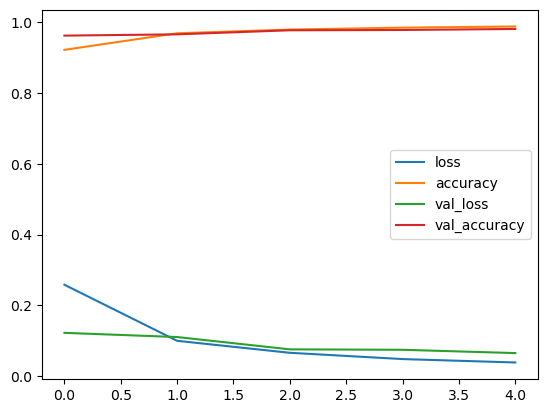

In [24]:
lenet_5_loss = pd.DataFrame(lenet_5.history.history)
lenet_5_loss.plot()

In [25]:
lenet_5.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0553 - accuracy: 0.9808


[0.05532898008823395, 0.9807999730110168]

## Predict Number

1/1 [==============================] - 0s 21ms/step


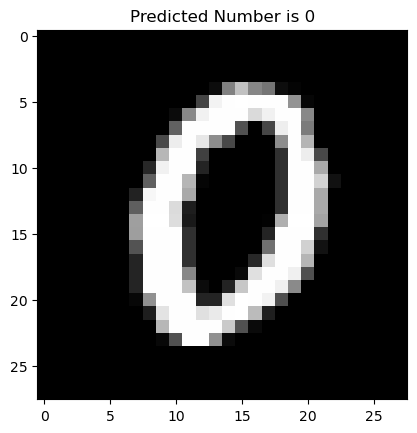

In [32]:
def predict_number(img, model):
    plt.imshow(img, 'gray')
    img = np.array([img])
    predicted_number = np.argmax(model.predict(img))
    plt.title("Predicted Number is " + str(predicted_number))

predict_number(x_test[312], lenet_5)